# Running a grid of models

Here is a notebook for running a grid of DYNAMITE models.

## Section 1

In [1]:
import sys
import dynamite as dyn

In [2]:
fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 14:43:56 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 14:43:56 - dynamite.config_reader.Configuration - io_settings...
[INFO] 14:43:56 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 14:43:56 - dynamite.config_reader.Configuration - model_components...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - ... using 4 CPUs.
[INFO] 14:43:57 - dynamite.config_reader.Configuration - legacy_settings...
[INFO] 14:43:57 - dynamite.config_reader.Configuration - System assembled
[INFO] 14:43:57 - dynamite.config_reader.Confi

In [3]:
# "run" the models
smi = dyn.model_iterator.ModelIterator(config=c)

[INFO] 14:43:57 - dynamite.model_iterator.ModelIterator - LegacyGridSearch: "iteration 0"
[INFO] 14:43:57 - dynamite.parameter_space.LegacyGridSearch - LegacyGridSearch added 1 new model(s) out of 1
[INFO] 14:43:57 - dynamite.model_iterator.ModelInnerIterator - ... running model 1 out of 1
[INFO] 14:43:57 - dynamite.orblib.LegacyOrbitLibrary - Calculating initial conditions
[INFO] 14:44:44 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library tube orbits
[INFO] 14:44:52 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library box orbits
[INFO] 14:45:03 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 14:45:03 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 14:45:06 - dynamite.plotter.Plotter - kinchi2 vs. model id plot created (1 models).
[INFO] 14:45:06 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/kinchi2_progress_plot.png saved in NGC6278_output/plots/
[I

[INFO] 14:48:58 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 14:48:58 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 14:48:59 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 14:48:59 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 14:49:02 - dynamite.model_iterator.ModelInnerIterator - ... running model 3 out of 4
[INFO] 14:49:02 - dynamite.model_iterator.ModelInnerIterator - ... running model 4 out of 4
[INFO] 14:49:06 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 14:49:06 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml4.00
[INFO] 14:49:06 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 14:49:06 - dynamite.weight_solvers.LegacyWeightSolver - 

If you have previously run the notebook ``running_a_model.ipynb`` then you may notice that 'model 1 out of 1' runs instantly. This is because the model has been run previously and the outputs have been saved, hence we can immediately read the output. Note: this is a bit risky because in ``running_a_model.ipynb`` we did not write ``all_models.table`` to a file so DYNAMITE assumes that the parameters used for the existing model are the same as defined in the config file's ``value:...`` statements.

After the grid of models has been run, the outputs are stored in ``all_models.table`` which is an ``Astropy`` table object,

In [4]:
c.all_models.table

m-bh,a-bh,c-dh,f-dh,q-stars,p-stars,u-stars,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter,directory
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ms],bool,bool,bool,int64,object
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,5.0,32879.18862513153,15733.575012462035,2021-07-17T11:45:06.000,True,True,True,0,orblib_000_000/ml5.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,5.0,34842.96511558838,17312.9139840719,2021-07-17T11:46:18.000,True,True,True,1,orblib_001_000/ml5.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,5.0,45124.79469455472,16370.575738920932,2021-07-17T11:46:19.000,True,True,True,1,orblib_001_001/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,1.0,495984.69337550097,362523.9774877257,2021-07-17T11:46:27.000,True,True,True,1,orblib_000_000/ml1.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,9.0,53383.47579179637,35452.72211135065,2021-07-17T11:46:27.000,True,True,True,1,orblib_000_000/ml9.00/
100000.0,0.001,8.0,5.623413251903491,0.54,0.99,0.9999,5.0,33502.62991175184,16305.620206716418,2021-07-17T11:47:42.000,True,True,True,2,orblib_002_000/ml5.00/
100000.0,0.001,8.0,17.78279410038923,0.54,0.99,0.9999,5.0,45248.00444593534,16060.253424536433,2021-07-17T11:47:42.000,True,True,True,2,orblib_002_001/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,3.0,75741.13582092243,52489.74848878279,2021-07-17T11:47:49.000,True,True,True,2,orblib_000_000/ml3.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,7.0,34617.91061672077,18153.2739794069,2021-07-17T11:47:49.000,True,True,True,2,orblib_000_000/ml7.00/


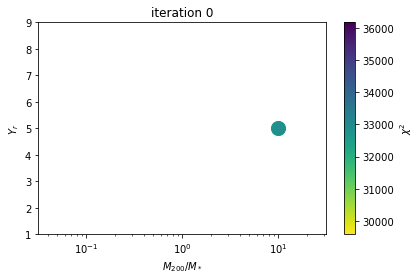

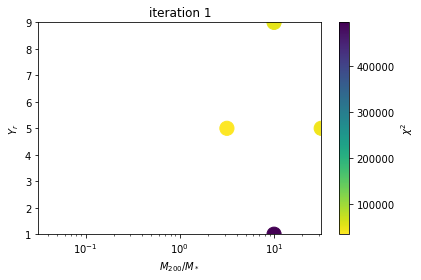

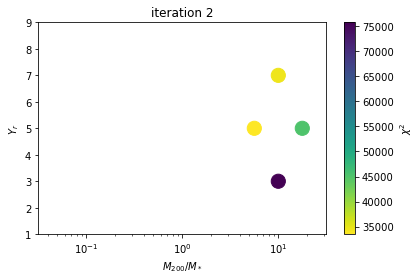

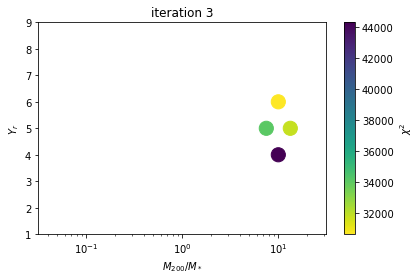

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# extract the lo/hi limits for the two free parameters f and ml

f = c.parspace.get_parameter_from_name('f-dh')
f_lims_raw = [f.par_generator_settings['lo'], f.par_generator_settings['hi']]
f_lims = [f.get_par_value_from_raw_value(lim0) for lim0 in f_lims_raw]

ml = c.parspace.get_parameter_from_name('ml')
ml_lims_raw = [ml.par_generator_settings['lo'], ml.par_generator_settings['hi']]
ml_lims = [ml.get_par_value_from_raw_value(lim0) for lim0 in ml_lims_raw]

# get list of iterations
iterations = np.unique(c.all_models.table['which_iter'])

# plot chi2 of models vs iterations
for iter0 in iterations:
    table = c.all_models.table
    table = table[table['which_iter']==iter0]
    plt.scatter(table['f-dh'],
                table['ml'],
                c=table['chi2'],
                cmap=plt.cm.viridis_r,
                s=200)
    cbar = plt.colorbar()
    cbar.set_label('$\chi^2$')
    plt.gca().set_title(f'iteration {iter0}')
    plt.gca().set_xlim(*f_lims)
    plt.gca().set_ylim(*ml_lims)
    plt.gca().set_xlabel(f.LaTeX)
    plt.gca().set_ylabel(ml.LaTeX)
    plt.gca().set_xscale('log')
    plt.tight_layout()
    plt.show()

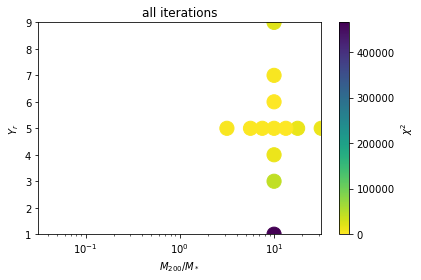

In [6]:
# plot the models: f-dh vs ml altogether
plt.scatter(c.all_models.table['f-dh'],
            c.all_models.table['ml'],
            c=c.all_models.table['chi2'] - np.min(c.all_models.table['chi2']),
            cmap=plt.cm.viridis_r,
            s=200)
cbar = plt.colorbar()
cbar.set_label('$\chi^2$')
plt.gca().set_title(f'all iterations')
plt.gca().set_xlim(*f_lims)
plt.gca().set_ylim(*ml_lims)
plt.gca().set_xlabel(f.LaTeX)
plt.gca().set_ylabel(ml.LaTeX)
plt.gca().set_xscale('log')
plt.tight_layout()
plt.show()